<a href="https://colab.research.google.com/github/RifkaASwasthi/Tugas-Besar-AKA/blob/main/AKA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Analisis kompleksitas algoritma dalam Pencarian Produk di Marketplace Online menggunakan Binary Search.

Rifka Annisa Swasthi (2311110040)

Avrilia Viananda Nagita (2311110010)

### 1. Tentukan 1 algoritma (dalam 2 versi, yaitu iteratif dan rekursif) untuk menyelesaikan permasalahan tersebut. Penentuan algoritma ini harus didasarkan atas alasan yang relevan dengan studi kasus permasalahan yang ditentukan pada nomor 1.

Binary Search adalah algoritma pencarian yang digunakan untuk menemukan elemen dalam daftar yang sudah terurut. Algoritma ini bekerja dengan cara membagi dua bagian data secara berulang-ulang dan membandingkan elemen yang dicari dengan elemen tengah di setiap iterasi. Jika elemen yang dicari lebih kecil atau lebih besar dari elemen tengah, algoritma akan mempersempit pencarian ke separuh bagian data yang relevan.

Mengapa Memilih Binary Search?

a) Efisien pada Data Terurut: Binary Search adalah algoritma yang sangat efisien untuk pencarian dalam data yang sudah terurut. Banyak marketplace online yang memiliki daftar produk terurut berdasarkan nama, harga, atau kategori, sehingga Binary Search sangat cocok untuk digunakan di situasi ini.

b) Kompleksitas Waktu yang Baik: Binary Search memiliki kompleksitas waktu O(log n), yang jauh lebih efisien dibandingkan dengan pencarian linear (dengan kompleksitas O(n)) dalam daftar yang tidak terurut.

c) Waktu Eksekusi yang Cepat: Untuk dataset besar, Binary Search jauh lebih cepat dibandingkan dengan metode pencarian lain yang harus memeriksa setiap elemen secara berurutan.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time


In [ ]:
data = pd.read_csv('/content/data_barang_supermarket_separated.csv')

In [ ]:
print(data)

      No     Nama Barang  Harga (Rp) Ukuran
0      1   Beras Premium       65000    5kg
1      2   Minyak Goreng       28000     2L
2      3      Gula Pasir       13000    1kg
3      4   Tepung Terigu       10000    1kg
4      5     Kopi Instan       35000   200g
..   ...             ...         ...    ...
145  146      Roti Tawar       17000   400g
146  147  Biskuit Kaleng       10000   500g
147  148  Cokelat Batang        8000   100g
148  149    Minuman Soda       14000     1L
149  150     Air Mineral        5000   1.5L

[150 rows x 4 columns]


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   No           150 non-null    int64 
 1   Nama Barang  150 non-null    object
 2   Harga (Rp)   150 non-null    int64 
 3   Ukuran       146 non-null    object
dtypes: int64(2), object(2)
memory usage: 4.8+ KB


In [ ]:
data.isnull().sum() #Memeriksa data apakah ada yang null atau tidak

,0
No,0
Nama Barang,0
Harga (Rp),0
Ukuran,4


In [ ]:
data_cleaned = data.dropna(subset=['Ukuran']) #Karena data Ukuran ada yang null 4, maka data akan dibersihkan dengan dihapus.


In [ ]:
data.duplicated().sum() #Mmeriksa apakah data ada yang double atau tidak

0

In [ ]:
np.random.seed(42)


In [ ]:
data = data.sample(frac=1, random_state=42).reset_index(drop=True)


### 2. Analisis efisiensi dari algoritma-algoritma yang diterapkan, dengan menentukan kelas kompleksitas waktunya, serta dengan menganalisis running time dari kedua program yang telah dibuat dalam berbagai macam ukuran masukan (misalkan ukuran masukan 1, 10, 20,..., 10000) dan gambarkan grafiknya, serta tentukan kelas kompleksitas masing-masing algoritma tersebut.

   Ukuran Data  Iterative (detik)  Recursive (detik)
0           10           0.000003           0.000002
1          100           0.000002           0.000003
2          500           0.000002           0.000002
3         1000           0.000001           0.000002
4         5000           0.000002           0.000002
5          150           0.000001           0.000002

Kelas Kompleksitas:
1. Pencarian Biner Iteratif: O(log n)
2. Pencarian Biner Rekursif: O(log n)


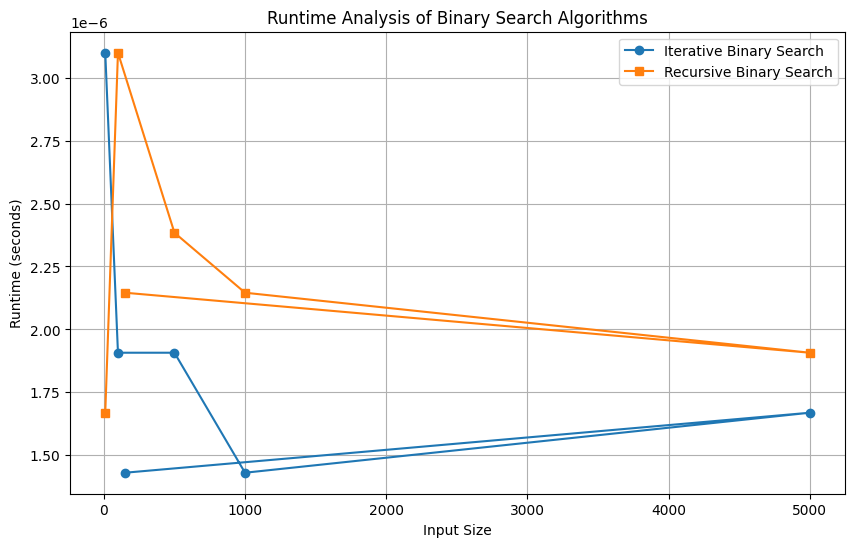

In [ ]:
import time
import pandas as pd
import matplotlib.pyplot as plt

# Sort the "Nama Barang"
sorted_data = data.sort_values(by="Nama Barang").reset_index(drop=True)
sorted_names = sorted_data["Nama Barang"].tolist()

# Binary Search Iterative Version
def binary_search_iterative(data, key):
    low, high = 0, len(data) - 1
    while low <= high:
        mid = (low + high) // 2
        if data[mid] == key:
            return mid
        elif data[mid] < key:
            low = mid + 1
        else:
            high = mid - 1
    return -1

# Binary Search Recursive Version
def binary_search_recursive(data, key, low, high):
    if low > high:
        return -1
    mid = (low + high) // 2
    if data[mid] == key:
        return mid
    elif data[mid] < key:
        return binary_search_recursive(data, key, mid + 1, high)
    else:
        return binary_search_recursive(data, key, low, mid - 1)

# Function to analyze runtime for varying input sizes
def analyze_runtime(sorted_names, search_key):
    input_sizes = [10, 100, 500, 1000, 5000, len(sorted_names)]
    iter_times = []
    recur_times = []

    for size in input_sizes:
        subset = sorted_names[:size]

        # Iterative runtime
        start_iter = time.time()
        binary_search_iterative(subset, search_key)
        end_iter = time.time()
        iter_times.append(end_iter - start_iter)

        # Recursive runtime
        start_recur = time.time()
        binary_search_recursive(subset, search_key, 0, len(subset) - 1)
        end_recur = time.time()
        recur_times.append(end_recur - start_recur)

    return input_sizes, iter_times, recur_times

# Fungsi untuk mencetak tabel waktu eksekusi
def print_execution_time_table(sizes, iterative_times, recursive_times):
    df = pd.DataFrame({
        'Ukuran Data': sizes,
        'Iterative (detik)': iterative_times,
        'Recursive (detik)': recursive_times
    })
    print(df)

# Analyze and collect runtime data
search_key = "Air Mineral"  # Nama barang yang dicari
input_sizes, iter_times, recur_times = analyze_runtime(sorted_names, search_key)

# Print the execution time table
print_execution_time_table(input_sizes, iter_times, recur_times)

# Menambahkan informasi kelas kompleksitas
print("\nKelas Kompleksitas:")
print("1. Pencarian Biner Iteratif: O(log n)")
print("2. Pencarian Biner Rekursif: O(log n)")

# Plotting results
plt.figure(figsize=(10, 6))
plt.plot(input_sizes, iter_times, marker='o', label='Iterative Binary Search')
plt.plot(input_sizes, recur_times, marker='s', label='Recursive Binary Search')
plt.title('Runtime Analysis of Binary Search Algorithms')
plt.xlabel('Input Size')
plt.ylabel('Runtime (seconds)')
plt.legend()
plt.grid(True)
plt.show()
